# 2.Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

In [12]:
#imports
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from pathlib import Path
from numpy import mean

plt.style.use('fast')

## sa se vizualizeze una din imagini

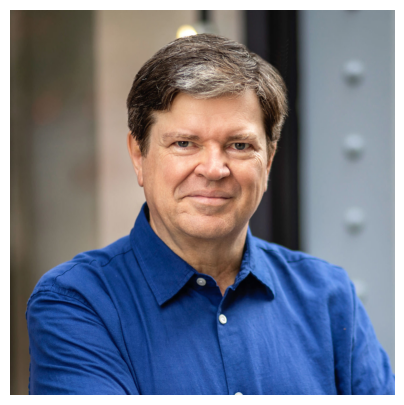

In [13]:
img = Image.open('data/images/LeCun.jpg')
fig1, ax  = plt.subplots(1,1,figsize=(5,5))

ax.imshow(img)
ax.axis('off')

plt.show()

## daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

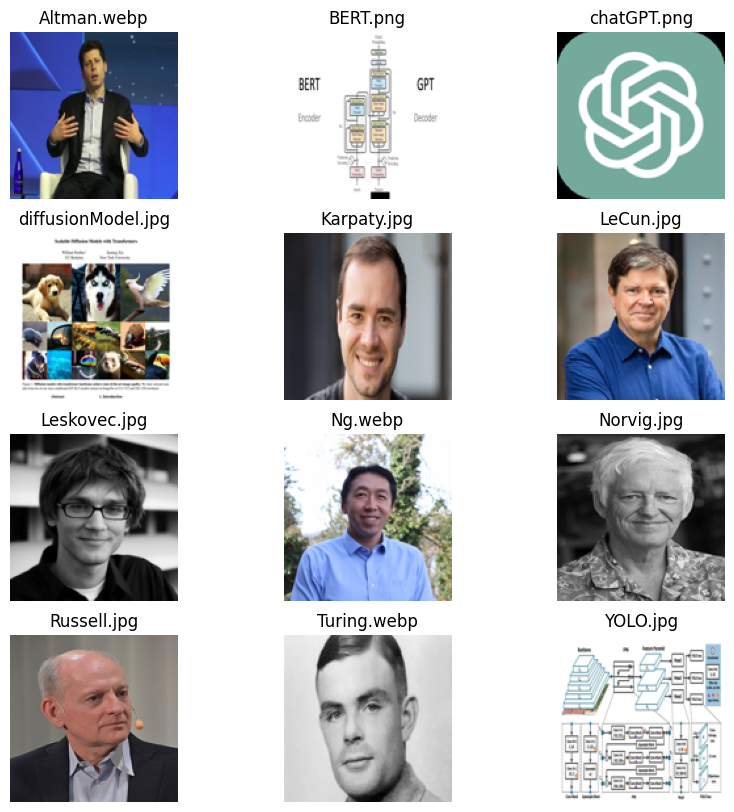

In [14]:
image_dir = Path('data/images')
image_files = [file for file in image_dir.iterdir()]
fig2, axes = plt.subplots(4,3,figsize=(10,10))

for i, ax in enumerate(axes.flat):
        img = Image.open(image_files[i]).convert('RGB') 
        img = img.resize((128, 128))
        
        ax.set_title(image_files[i].name)
        ax.imshow(img)
        ax.axis('off') 

plt.show()

sa se transforme imaginile in format gray-levels si sa se vizualizeze

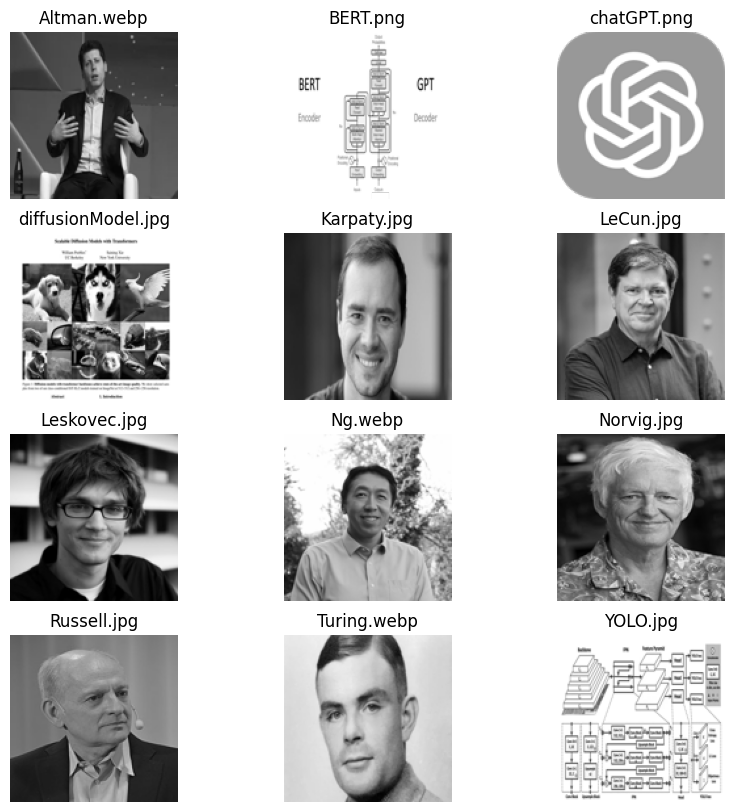

In [15]:
image_dir = Path('data/images')
image_files = [file for file in image_dir.iterdir()]
fig3, axes = plt.subplots(4,3,figsize=(10,10))

for i, ax in enumerate(axes.flat):
        img = Image.open(image_files[i]).convert('LA')  
        img = img.resize((128, 128))
        
        ax.imshow(img)
        ax.set_title(image_files[i].name)
        ax.axis('off') 

plt.show()

## sa se blureze o imagine si sa se afiseze in format "before-after"

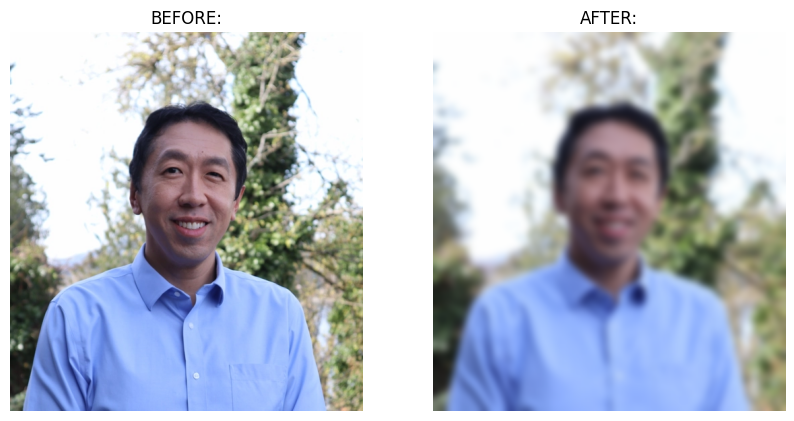

In [16]:
image = Image.open('data/images/Ng.webp')
fig4, axes = plt.subplots(1,2,figsize=(10,10))

axes[0].imshow(image)
axes[0].set_title('BEFORE:')
axes[0].axis('off')

bImg = image.filter(ImageFilter.GaussianBlur(5))
axes[1].imshow(bImg)
axes[1].set_title('AFTER:')
axes[1].axis('off')

plt.show()

## sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after"

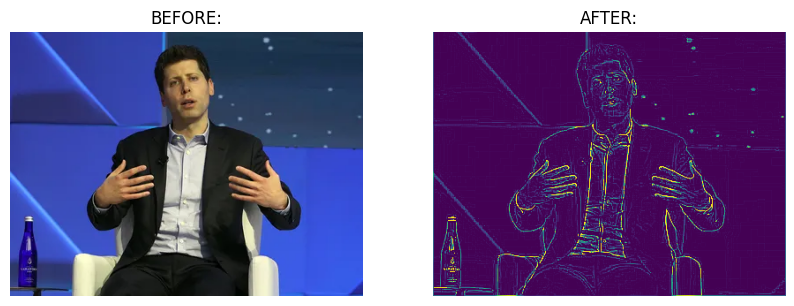

In [17]:
image = Image.open('data/images/Altman.webp')
fig5, axes = plt.subplots(1,2,figsize=(10,10))

axes[0].imshow(image)
axes[0].set_title('BEFORE:')
axes[0].axis('off')

bImg = image.convert('L').filter(ImageFilter.FIND_EDGES)
axes[1].imshow(bImg)
axes[1].set_title('AFTER:')
axes[1].axis('off')

plt.show()

# Problema 4  Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

## problema 2 - valorile pixelilor din imagini

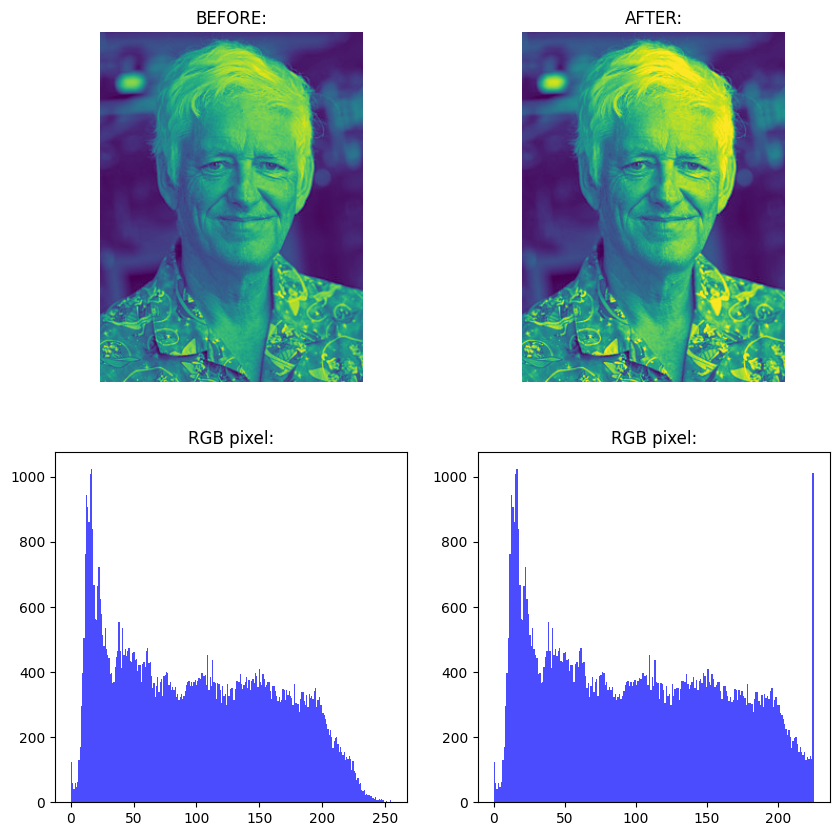

In [18]:
image = Image.open('data/images/Norvig.jpg').convert('L')

Pixeli = list(image.getdata())

PixeliNorm = [ rp if rp <= 225 else 225 for rp in Pixeli]

new_image = Image.new('L', image.size)
new_image.putdata(PixeliNorm)

fig6, axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].imshow(image)
axes[0,0].set_title('BEFORE:')
axes[0,0].axis('off')

axes[1,0].hist(Pixeli, bins=256, color='blue', alpha=0.7)
axes[1,0].set_title('RGB pixel:')
axes[1,0].axis('on')

axes[0,1].imshow(new_image)
axes[0,1].set_title('AFTER:')
axes[0,1].axis('off')

axes[1,1].hist(PixeliNorm, bins=225, color='blue', alpha=0.7)
axes[1,1].set_title('RGB pixel:')
axes[1,1].axis('on')

plt.show()